# Group Members: Ryan Hoff (rjb3662), Cory Nguyen (chn334)


# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [5]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.


Mean Squared Error: 6455.708453830031


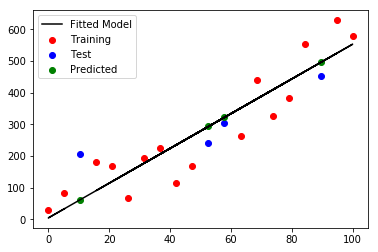

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Model Fitting
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

# Making Predictions
predictions0_train = lm.predict(x_train)
predictions0_test = lm.predict(x_test)

# Calculating MSE
mse_train = mean_squared_error(y_test, predictions0_test)
print ('Mean Squared Error: ' + str(mse_train))

# Plotting
plt.scatter(x_train, y_train, color = 'r', label = 'Training')
plt.scatter(x_test, y_test, color = 'b', label = 'Test')
plt.scatter(x_test, predictions0_test, color = 'g', label = 'Predicted')
plt.plot(x_train, predictions0_train, color='black', label = 'Fitted Model')
plt.legend()
plt.show()

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

Training Mean Squared Error for Polynomial model of Degree 2: 3638.12177725299
Test Mean Squared Error for Polynomial model of Degree 2: 4683.309906329018


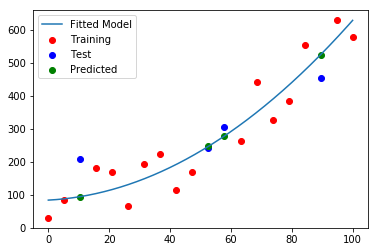

Training Mean Squared Error for Polynomial model of Degree 3: 3569.900366307118
Test Mean Squared Error for Polynomial model of Degree 3: 4602.202716053174


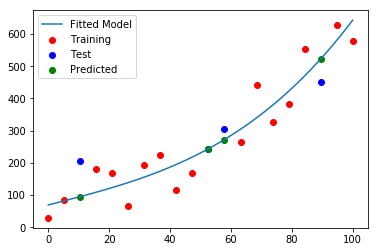

Training Mean Squared Error for Polynomial model of Degree 5: 2661.5660744383727
Test Mean Squared Error for Polynomial model of Degree 5: 6599.133603518122


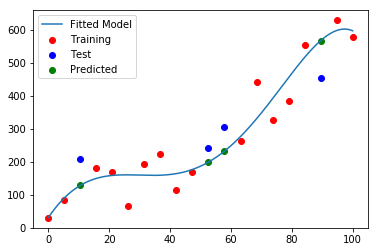

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

for n in [2, 3, 5]: # Set Degree
    # Model Fitting
    poly_model = PolynomialFeatures(degree = n)
    pm = Pipeline([('poly', poly_model),
                   ('linear', linear_model.LinearRegression())])
    pm.fit(x_train, y_train)
    poly_x = poly_model.fit_transform(x_train)

    # Making Predictions
    pm_predictions0_train = pm.predict(x_train)
    pm_predictions0_test = pm.predict(x_test)

    # Calculating MSE
    mse_train = mean_squared_error(y_train, pm_predictions0_train)    
    mse_test = mean_squared_error(y_test, pm_predictions0_test)
    print ('Training Mean Squared Error for Polynomial model of Degree {}: '.format(n) + str(mse_train))
    print ('Test Mean Squared Error for Polynomial model of Degree {}: '.format(n) + str(mse_test))

    # Plotting the Points
    plt.scatter(x_train, y_train, color = 'r', label = 'Training')
    plt.scatter(x_test, y_test, color = 'b', label = 'Test')
    plt.scatter(x_test, pm_predictions0_test, color = 'g', label = 'Predicted')

    # Plotting the Line
    xfit = np.linspace(0, 100, 10000)
    pm.fit(x_train.reshape(-1,1), y_train)
    yfit = pm.predict(xfit.reshape(-1,1))
    plt.plot(xfit, yfit, label = 'Fitted Model')

    plt.legend()
    plt.show()

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

The model that performed best is the 3rd degree polynomial model because it has the lowest MSE. This makes sense over the 5th degree model because at that point, the data is overfitting to the training data. Referring to the bias-variance tradeoff, by increasing the degree of the model, we are decreasing bias while increasing variance. Up until the 3rd degree, we will find that the bias decreases more than the variance increases, hence why MSE is decreasing overall. 

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [9]:
print ('The shape of the data is ' + str(data.shape[0]) + ' rows by ' + str(data.shape[1]) + ' columns.')
data.head(5)

The shape of the data is 200 rows by 4 columns.


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

The rounded cutoff values for TV are: (-142, 436)
The rounded cutoff values for Radio are: (-30, 76)
The rounded cutoff values for Newspaper are: (-36, 94)
The rounded cutoff values for Sales are: (0, 28)


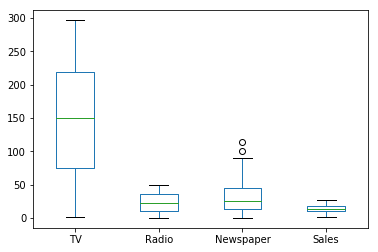

In [10]:
data.plot.box()
def calculate_IQR(s):
    lower = s.quantile(.25)
    upper = s.quantile(.75)
    IQR = upper - lower
    limits = (round(lower - 1.5*IQR), round(upper + 1.5*IQR))
    return limits
for i in data.columns:
    cutoff = calculate_IQR(data[i])
    print('The rounded cutoff values for ' + i + ' are: ' + str(cutoff))

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Sales')

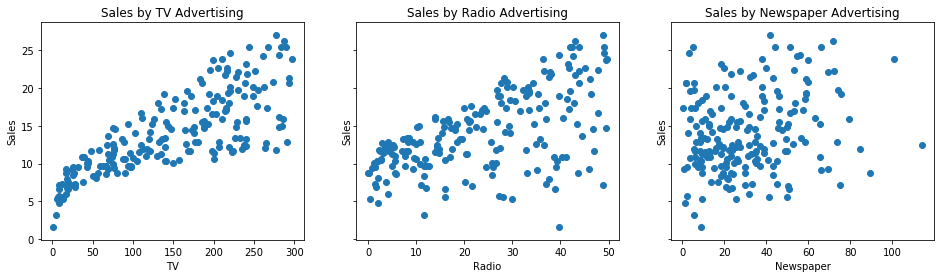

In [11]:
%pylab inline
fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                sharey=True,
                                figsize=(16,4))

ax1.scatter(data.TV, data.Sales)
ax1.set_title('Sales by TV Advertising')
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2.scatter(data.Radio, data.Sales)
ax2.set_title('Sales by Radio Advertising')
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3.scatter(data.Newspaper, data.Sales)
ax3.set_title('Sales by Newspaper Advertising')
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')

#### Based on the scatter plots, TV seems to have the best linear fit against Sales. The other two advertising methods do not seem to have any easy models that fit sales.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Model Fitting
x = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
lm = linear_model.LinearRegression()
lm.fit(x, y)

# Find the coefficient
print('The model coefficient for TV is: ' + str(lm.coef_[0][0]))

The model coefficient for TV is: 0.047536640433019764


#### The model model coefficient can be interpreted as "for every unit increase in TV advertising, sales will increase by 0.0475 units."

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
x = data.drop(columns='Sales').values
y = data['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit the model and get MSE
lm.fit(x_train, y_train)
predictions1_test = lm.predict(x_test)
mse_1 = mean_squared_error(y_test, predictions1_test)
print('Root Mean Squared Error: ' + str(np.sqrt(mse_1)))

Root Mean Squared Error: 1.9307843822347204


(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [14]:
# Get predictions on the training data
predictions1_train = lm.predict(x_train)
mse_1_train = mean_squared_error(y_train, predictions1_train)
print('Training Mean Squared Error: ' + str(mse_1_train))
print('Test Mean Squared Error: ' + str(mse_1))
print('The increase is: ' + str(mse_1 - mse_1_train))

Training Mean Squared Error: 2.4108586545578543
Test Mean Squared Error: 3.7279283306815105
The increase is: 1.3170696761236562


(g) (1pts) Report the coefficients obtained by your model.

In [15]:
for count, i in enumerate(['TV','Radio','Newspaper']):
    print('The coefficient for the {} feature is: '.format(i) + str(lm.coef_[count]))

The coefficient for the TV feature is: 0.04466512063271281
The coefficient for the Radio feature is: 0.19663006282624826
The coefficient for the Newspaper feature is: 0.006074386547886895


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [16]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [18]:
lm.fit(X_train, y_train)
predictions2_test = lm.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions2_test)
predictions2_train = lm.predict(X_train)
mse_2_train = mean_squared_error(y_train, predictions2_train)
print('Training Root Mean Squared Error: ' + str(np.sqrt(mse_2_train)))
print('Test Root Mean Squared Error: ' + str(np.sqrt(mse_2)))
print('The increase is: ' + str(np.sqrt(mse_2) - np.sqrt(mse_2_train)))

Training Root Mean Squared Error: 52.007732294217874
Test Root Mean Squared Error: 57.428059772853565
The increase is: 5.420327478635691


b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [19]:
hr = linear_model.HuberRegressor(alpha=0.0)
hr.fit(X_train, y_train)
predictions2_test = hr.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions2_test)
predictions2_train = hr.predict(X_train)
mse_2_train = mean_squared_error(y_train, predictions2_train)
print('Training Root Mean Squared Error: ' + str(np.sqrt(mse_2_train)))
print('Test Root Mean Squared Error: ' + str(np.sqrt(mse_2)))
print('The increase is: ' + str(np.sqrt(mse_2) - np.sqrt(mse_2_train)))

Training Root Mean Squared Error: 52.1635703926353
Test Root Mean Squared Error: 57.15005047098842
The increase is: 4.986480078353118


Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

In [20]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

lm.fit(X_train, y_train_outliers)
predictions2_test_lm = lm.predict(X_test)
residuals_lm = y_test - predictions2_test_lm
mse_2 = mean_squared_error(y_test, predictions2_test_lm)
predictions2_train = lm.predict(X_train)
mse_2_train = mean_squared_error(y_train_outliers, predictions2_train)
print('Training Root Mean Squared Error: ' + str(np.sqrt(mse_2_train)))
print('Test Root Mean Squared Error: ' + str(np.sqrt(mse_2)))

Training Root Mean Squared Error: 286.26410306560086
Test Root Mean Squared Error: 82.21820407137498


d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [21]:
hr = linear_model.HuberRegressor(alpha=0.0)
hr.fit(X_train, y_train_outliers)
predictions2_test = hr.predict(X_test)
residuals_hr = y_test - predictions2_test
mse_2 = mean_squared_error(y_test, predictions2_test)
predictions2_train = hr.predict(X_train)
mse_2_train = mean_squared_error(y_train_outliers, predictions2_train)
print('Training Root Mean Squared Error: ' + str(np.sqrt(mse_2_train)))
print('Test Root Mean Squared Error: ' + str(np.sqrt(mse_2)))

Training Root Mean Squared Error: 290.22238400718453
Test Root Mean Squared Error: 57.56638282322018


#### Compared to the linear model, the Huber regression model is more robust when an outlier is present. This can be seen by the out-of-sample RMSE staying roughly the same despite the addition of an outlier. On the other hand, we see the OOS RMSE increase by 30 units in the linear regression model.

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

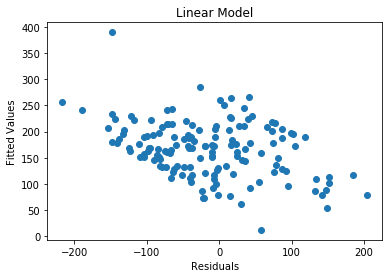

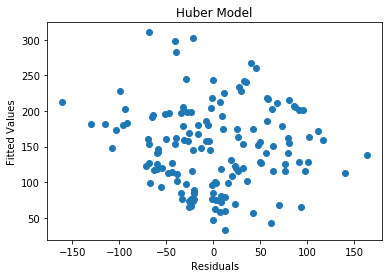

In [22]:
# The residuals were already stored in parts C and D
plt.scatter(residuals_lm, predictions2_test_lm)
plt.title('Linear Model')
plt.ylabel('Fitted Values')
plt.xlabel('Residuals')
plt.show()

plt.scatter(residuals_hr, predictions2_test)
plt.title('Huber Model')
plt.ylabel('Fitted Values')
plt.xlabel('Residuals')
plt.show()

#### We can see that there is some negative correlation between the residuals of the linear model, while there is no noticable correlation between the residuals of the Huber model. Because of this, we can say that the Huber model is better.

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

feature_name = ['x'+str(i) for i in range(1,11)]
selector = RFE(lm, 3, step=1)
selector.fit(X_train, y_train)
selector.support_

array([False, False,  True, False,  True, False, False, False,  True,
       False])

#### The 3 most significant factors by backward selection are x3, x5, and x9.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [36]:
# mlxtend needs to be installed, I used pip install mlxtend in the terminal
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forward = SFS(lm, 
          k_features=3, 
          forward=True, 
          floating=False,
          scoring = 'neg_mean_squared_error')

model_forward = forward.fit(X_train, y_train)
print(model_forward.k_feature_idx_)

(2, 3, 8)


#### The 3 most significant factors by forward selection are x2, x3, and x8

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

In [25]:
z_alpha = 1.645 # z-alpha level for 90% two-tailed confidence intervals
moe = 0.09 # Desired margin of error
p = .3

n = (p*(1-p))/np.square(moe/z_alpha)
print("The necessary sample size is {} people.".format(ceil(n)))

The necessary sample size is 71.0 people.


(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

In [26]:
z_alpha = 1.96 # z-alpha level for 95% two-tailed confidence intervals

n = (p*(1-p))/np.square(moe/z_alpha)
print("The necessary sample size is {} people.".format(ceil(n)))

The necessary sample size is 100.0 people.


(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

In [27]:
p = .5

n = (p*(1-p))/np.square(moe/z_alpha)
print("The necessary sample size for the worst case scenario is {} people.".format(ceil(n)))

The necessary sample size for the worst case scenario is 119.0 people.


# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [28]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

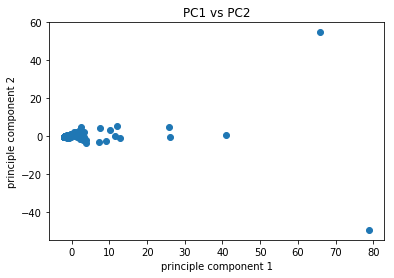

In [30]:
from sklearn.decomposition import PCA

# Fit the PCA model
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

# Plot the PCA model
plt.scatter(x=X_pca[:,0], y=X_pca[:,1]) 
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('PC1 vs PC2')
plt.show()

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

In [31]:
first_component = pd.Series(X_pca[:,0],index = df.index)
first_component.sort_values(ascending = False)[:6]

Country
China      78.808512
Canada     65.904733
Mexico     40.812633
Japan      26.098581
Germany    25.743293
Italy      12.843229
dtype: float64

#### The six countries with the highest first component are: China, Canada, Mexico, Japan, Germany, and Italy.

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

Text(0.5,1,'Cumulative Proportion of Variance Explained')

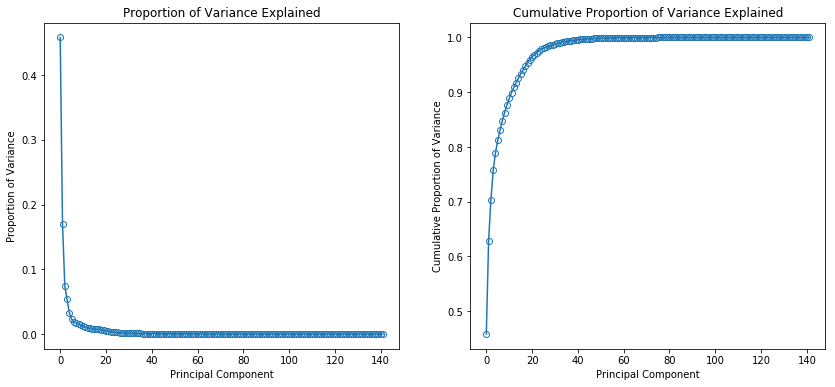

In [32]:
pca_all = PCA()
pca_all.fit(df_scaled)

fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(14,6))

ax1.plot(pca_all.explained_variance_ratio_, marker = 'o', markerfacecolor='none') 
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Variance')
ax1.set_title('Proportion of Variance Explained')

ax2.plot(np.cumsum(pca_all.explained_variance_ratio_), marker = 'o', markerfacecolor='none')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Proportion of Variance')
ax2.set_title('Cumulative Proportion of Variance Explained')

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

In [33]:
cum_exp = np.cumsum(pca_all.explained_variance_ratio_)

pca_30 = np.where(cum_exp >= 0.3)[0][0]+1
pca_60 = np.where(cum_exp >= 0.6)[0][0]+1
pca_90 = np.where(cum_exp >= 0.9)[0][0]+1

print ('{} principal component is required to explain cumulative variance of 30%'.format(pca_30))
print ('{} principal components are required to explain cumulative variance of 60%'.format(pca_60))
print ('{} principal components are required to explain cumulative variance of 90%'.format(pca_90))

1 principal component is required to explain cumulative variance of 30%
2 principal components are required to explain cumulative variance of 60%
13 principal components are required to explain cumulative variance of 90%


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

We might want to use PCA when:

1) There is a very large number of features and we want to reduce model complexity by lowering the number of features used in the model.

2) There are features that are correlated. By using PCA, we can ensure that each component is independent from each other as the loadings are orthogonal.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

The eigenvectors represent the loadings of PCA. The loadings are vectors that can be multiplied to an X matrix with the fitted features to generate the principal components. 

The eigenvalues are proportional to the amount of variance in the aforementioned X matrix that is explained by each principle component. However, since the eigenvalue matrix is computed with the formula cov(X) = VDV^,  the sum of the diagonal in the D matrix is equal to 1*(number of features fit), assuming that the data is scaled. This is because each diagonal in the cov(X) matrix is equal to 1. Therefore, in order to determine the percent of the variance gained from each component, we need to divide the eigenvalue matrix by the number of features fit that way the sum of the diagonal will lie between 0 and 1, the legal domain for probabilities.